In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
n_cores = multiprocessing.cpu_count()
print(n_cores)


6


In [2]:
from quantrocket.master import get_securities
securities = get_securities(vendors="usstock", sec_types="STK")

In [3]:
filtered_securities = securities[securities.Delisted==False]
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]

In [4]:
from quantrocket import get_prices
prices = get_prices("usstock-free-1d", universes="usstock-free", start_date="2017-01-01", fields=["Close"])
prices.head(2)

Sid               FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  \
Field Date                                                         
Close 2017-01-03         26.9552        102.3847        113.5070   
      2017-01-04         26.9251        102.6583        114.5127   

Sid               FIBBG000BMHYD1  FIBBG000BPH459  FIBBG000GZQ728  \
Field Date                                                         
Close 2017-01-03         95.2870         57.0333         64.4867   
      2017-01-04         95.1307         56.7781         63.7772   

Sid               FIBBG00B3T3HD3  
Field Date                        
Close 2017-01-03         28.2195  
      2017-01-04         29.6192

In [5]:
closes = prices.loc["Close"]
closes.head(2)

Sid         FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  FIBBG000BMHYD1  \
Date                                                                         
2017-01-03         26.9552        102.3847        113.5070         95.2870   
2017-01-04         26.9251        102.6583        114.5127         95.1307   

Sid         FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Date                                                        
2017-01-03         57.0333         64.4867         28.2195  
2017-01-04         56.7781         63.7772         29.6192

# Data Science vanillia ML regression model for stock price prediction

In [6]:
df = closes['FIBBG000BPH459'].to_frame()
df.columns = ['close']
df=df.dropna()
df.head()
df1 = df.copy()

No handles with labels found to put in legend.


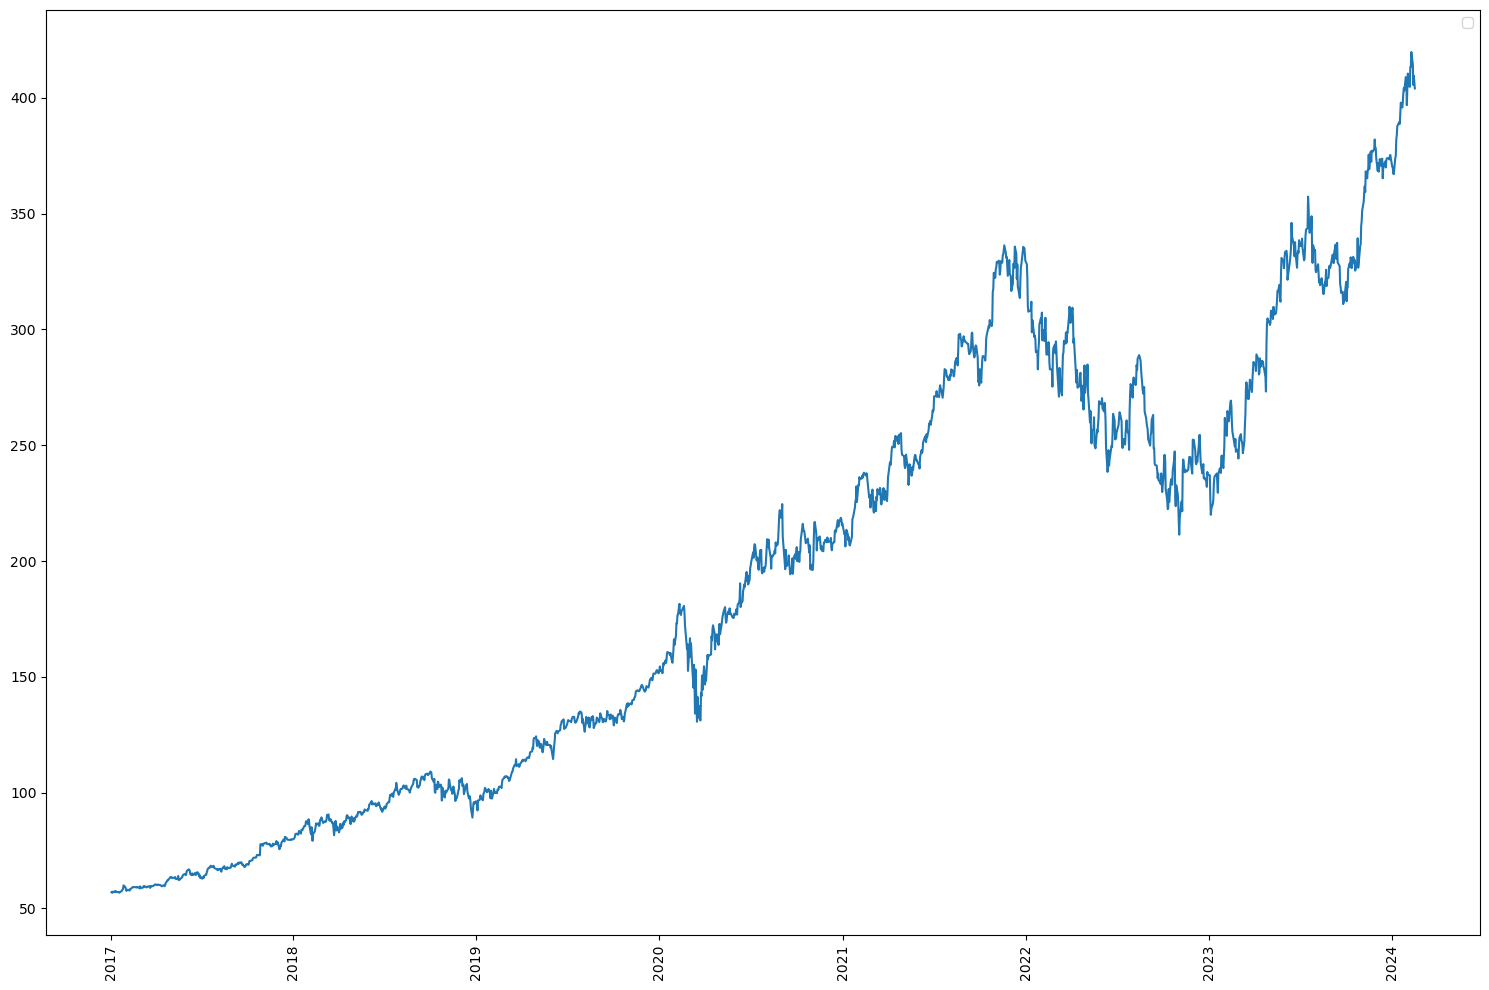

In [7]:
from matplotlib.dates import YearLocator, date2num, DateFormatter
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)

fig.set_size_inches(15, 10)
ax.plot(df.index, df['close'])
lctr = YearLocator() 
frmt = DateFormatter('%Y')
ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# create training dataset (single symbol)

In [8]:
for i in range(1, 41):
    df[f'{i}d'] = df['close'].shift(-i)
df.dropna(inplace=True)
df

close        1d        2d        3d        4d        5d  \
Date                                                                     
2017-01-03   57.0333   56.7781   56.7781   57.2702   57.0879   57.0697   
2017-01-04   56.7781   56.7781   57.2702   57.0879   57.0697   57.5892   
2017-01-05   56.7781   57.2702   57.0879   57.0697   57.5892   57.0606   
2017-01-06   57.2702   57.0879   57.0697   57.5892   57.0606   57.1426   
2017-01-09   57.0879   57.0697   57.5892   57.0606   57.1426   56.9877   
...              ...       ...       ...       ...       ...       ...   
2023-12-13  373.6790  365.2546  370.0457  371.9621  372.5710  369.9359   
2023-12-14  365.2546  370.0457  371.9621  372.5710  369.9359  372.8505   
2023-12-15  370.0457  371.9621  372.5710  369.9359  372.8505  373.8886   
2023-12-18  371.9621  372.5710  369.9359  372.8505  373.8886  373.9684   
2023-12-19  372.5710  369.9359  372.8505  373.8886  373.9684  373.3795   

                  6d        7d        8d        9d  ...       31d       32d  \
Date                                                ...                       
2017-01-03   57.5892   57.0606   57.1426   56.9877  ...   59.1578   59.2495   
2017-01-04   57.0606   57.1426   56.9877   56.9604  ...   59.2495   59.1303   
2017-01-05   57.1426   56.9877   56.9604   56.7781  ...   59.1303   59.0111   
2017-01-06   56.9877   56.9604   56.7781   57.1791  ...   59.0111   59.2495   
2017-01-09   56.9604   56.7781   57.1791   57.3796  ...   59.2495   59.2495   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-13  372.8505  373.8886  373.9684  373.3795  ...  407.8358  396.8461   
2023-12-14  373.8886  373.9684  373.3795  374.5873  ...  396.8461  403.0347   
2023-12-15  373.9684  373.3795  374.5873  375.3459  ...  403.0347  410.4610   
2023-12-18  373.3795  374.5873  375.3459  370.1854  ...  410.4610  404.9012   
2023-12-19  374.5873  375.3459  370.1854  369.9159  ...  404.9012  404.7415   

                 33d       34d       35d       36d       37d       38d  \
Date                                                                     
2017-01-03   59.1303   59.0111   59.2495   59.2495   58.8919   58.6627   
2017-01-04   59.0111   59.2495   59.2495   58.8919   58.6627   59.5429   
2017-01-05   59.2495   59.2495   58.8919   58.6627   59.5429   58.6902   
2017-01-06   59.2495   58.8919   58.6627   59.5429   58.6902   58.9102   
2017-01-09   58.8919   58.6627   59.5429   58.6902   58.9102   58.9286   
...              ...       ...       ...       ...       ...       ...   
2023-12-13  403.0347  410.4610  404.9012  404.7415  413.2857  413.3456   
2023-12-14  410.4610  404.9012  404.7415  413.2857  413.3456  419.7737   
2023-12-15  404.9012  404.7415  413.2857  413.3456  419.7737  414.4935   
2023-12-18  404.7415  413.2857  413.3456  419.7737  414.4935  405.5700   
2023-12-19  413.2857  413.3456  419.7737  414.4935  405.5700  409.4900   

                 39d       40d  
Date                            
2017-01-03   59.5429   58.6902  
2017-01-04   58.6902   58.9102  
2017-01-05   58.9102   58.9286  
2017-01-06   58.9286   59.0478  
2017-01-09   59.0478   59.5887  
...              ...       ...  
2023-12-13  419.7737  414.4935  
2023-12-14  414.4935  405.5700  
2023-12-15  405.5700  409.4900  
2023-12-18  409.4900  406.5600  
2023-12-19  406.5600  404.0600  

[1753 rows x 41 columns]

In [9]:
features = {}
targets = {}
for i in range(1, 41):
    if i < 33:
        features[f'{i}d'] = df[f'{i}d']
    else:
        targets[f'{i}d'] = df[f'{i}d']

In [10]:
features['32d'].head()

Date
2017-01-03    59.2495
2017-01-04    59.1303
2017-01-05    59.0111
2017-01-06    59.2495
2017-01-09    59.2495
Name: 32d, dtype: float64

In [11]:
targets['40d'].head()

Date
2017-01-03    58.6902
2017-01-04    58.9102
2017-01-05    58.9286
2017-01-06    59.0478
2017-01-09    59.5887
Name: 40d, dtype: float64

In [12]:
X = df.iloc[:,  :33]
y = df.iloc[:, 33:]
X.head(2)

close       1d       2d       3d       4d       5d       6d  \
Date                                                                        
2017-01-03  57.0333  56.7781  56.7781  57.2702  57.0879  57.0697  57.5892   
2017-01-04  56.7781  56.7781  57.2702  57.0879  57.0697  57.5892  57.0606   

                 7d       8d       9d  ...      23d      24d      25d  \
Date                                   ...                              
2017-01-03  57.0606  57.1426  56.9877  ...  57.9993  57.8079  57.7259   
2017-01-04  57.1426  56.9877  56.9604  ...  57.8079  57.7259  58.3821   

                26d      27d      28d      29d      30d      31d      32d  
Date                                                                       
2017-01-03  58.3821  58.3274  58.9836  59.2036  59.1670  59.1578  59.2495  
2017-01-04  58.3274  58.9836  59.2036  59.1670  59.1578  59.2495  59.1303  

[2 rows x 33 columns]

In [13]:
y.head(2)

33d      34d      35d      36d      37d      38d      39d  \
Date                                                                        
2017-01-03  59.1303  59.0111  59.2495  59.2495  58.8919  58.6627  59.5429   
2017-01-04  59.0111  59.2495  59.2495  58.8919  58.6627  59.5429  58.6902   

                40d  
Date                 
2017-01-03  58.6902  
2017-01-04  58.9102

## plot first row X and y

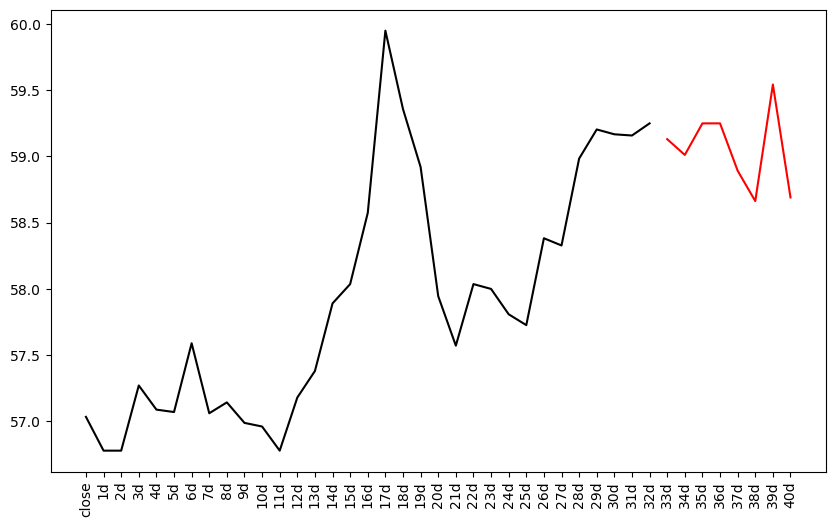

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(X.iloc[0, :],  color='black')
ax.plot(y.iloc[0, :],  color='red')
plt.xticks(rotation=90)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1051, 33), (702, 33), (1051, 8), (702, 8))

# create and train the model

In [17]:
from re import T
from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(
    
    n_estimators=100,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    # min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=n_cores,
    random_state=None,
    verbose=1,
    warm_start=False,
)

In [18]:
regressor.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(n_jobs=6, oob_score=True, verbose=1)

In [19]:
regressor.score(X_test, y_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9951741870746742

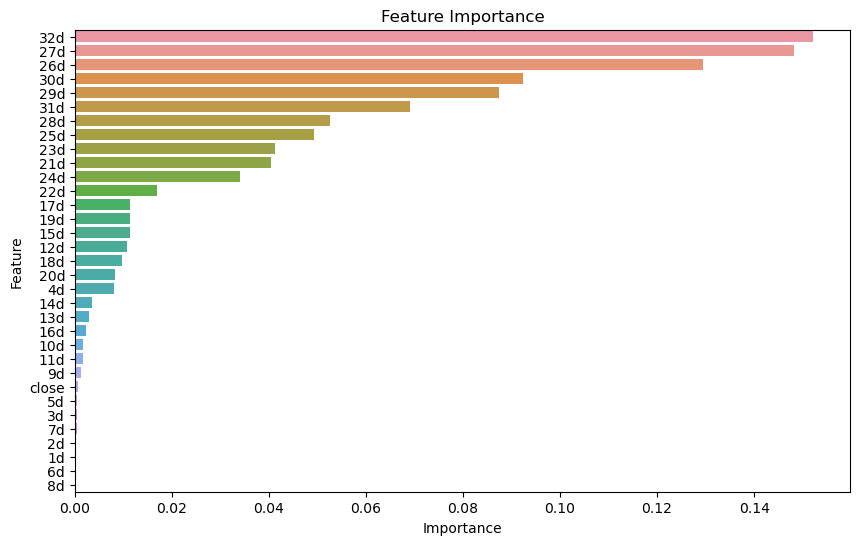

In [20]:
import seaborn as sns

importances = regressor.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [21]:
y_predict = regressor.predict(X_test)
y_predict

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[ 92.837188,  93.492618,  94.357595, ...,  94.904507,  94.955739,
         94.990998],
       [110.955469, 110.903536, 110.915625, ..., 110.283553, 110.595865,
        110.02981 ],
       [108.365814, 108.411714, 108.508109, ..., 108.385786, 108.068516,
        106.533172],
       ...,
       [249.540888, 251.206829, 253.752615, ..., 255.116941, 257.139159,
        257.423773],
       [202.503617, 200.399521, 201.071479, ..., 199.628458, 199.085009,
        200.198019],
       [227.306945, 228.813709, 229.378069, ..., 232.807273, 233.403539,
        233.885322]])

## check predictions

No handles with labels found to put in legend.


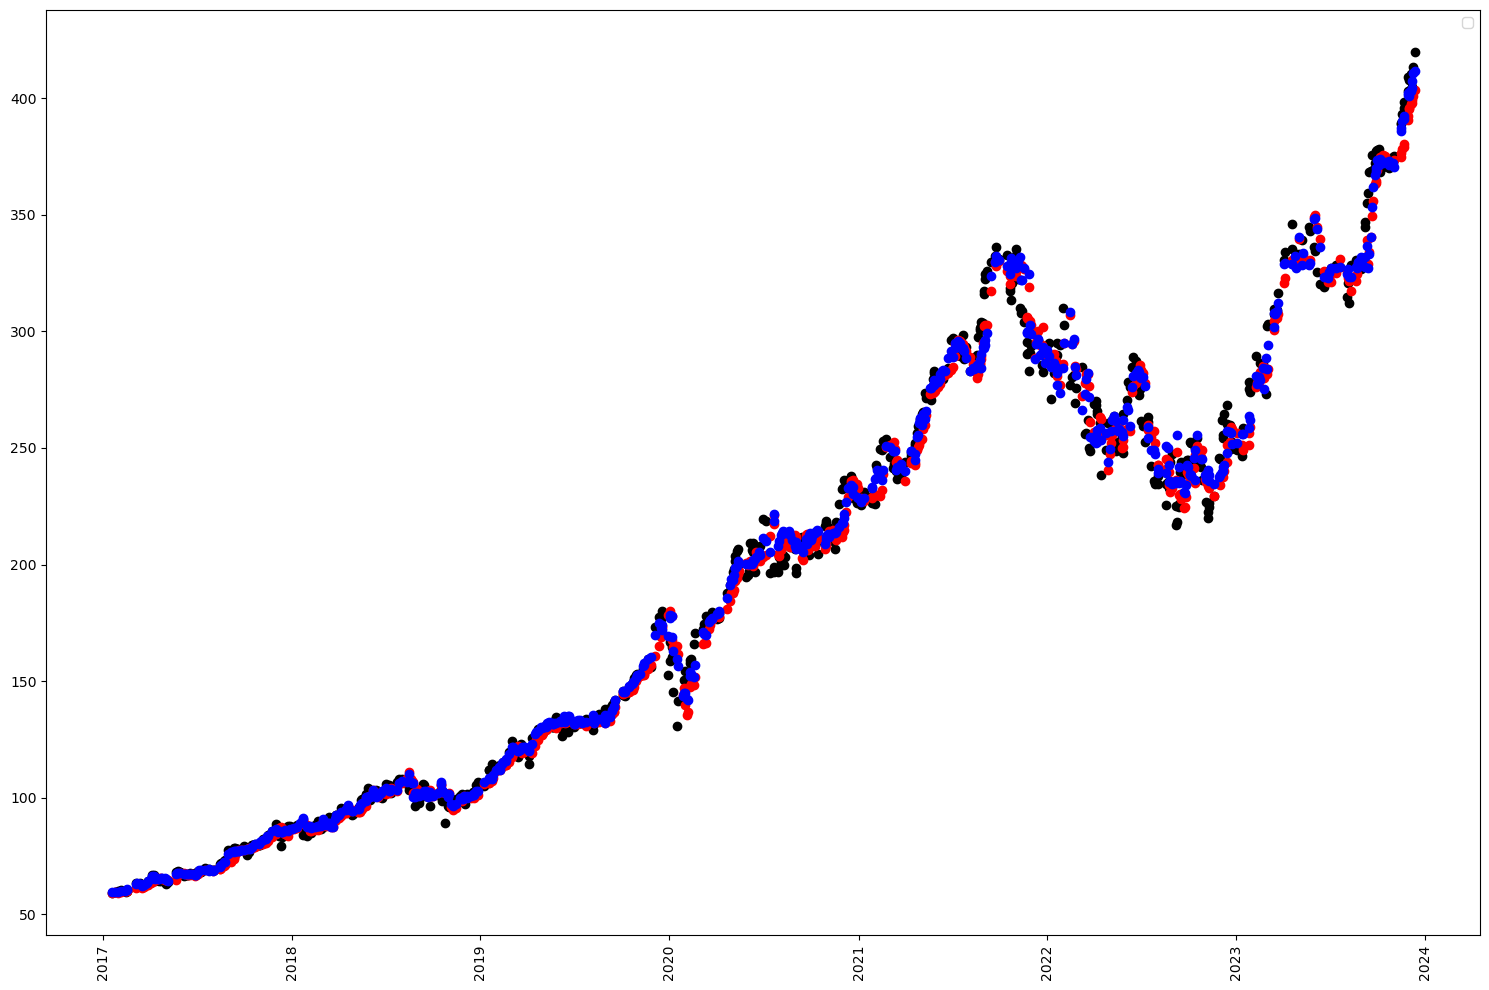

In [22]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(15)
fig.set_figheight(10)

ax.plot(y_test.index, y_test['40d'], 'o', color='black')
ax.plot(y_test.index, y_predict[:, 1], 'o', color='red')
ax.plot(y_test.index, y_predict[:, 7], 'o', color='blue')

ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
y_predict = regressor.predict(X_test.sort_index())

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


In [24]:
from joblib import dump, load
dump(regressor, 'rf_regressor.joblib')

['rf_regressor.joblib']

No handles with labels found to put in legend.


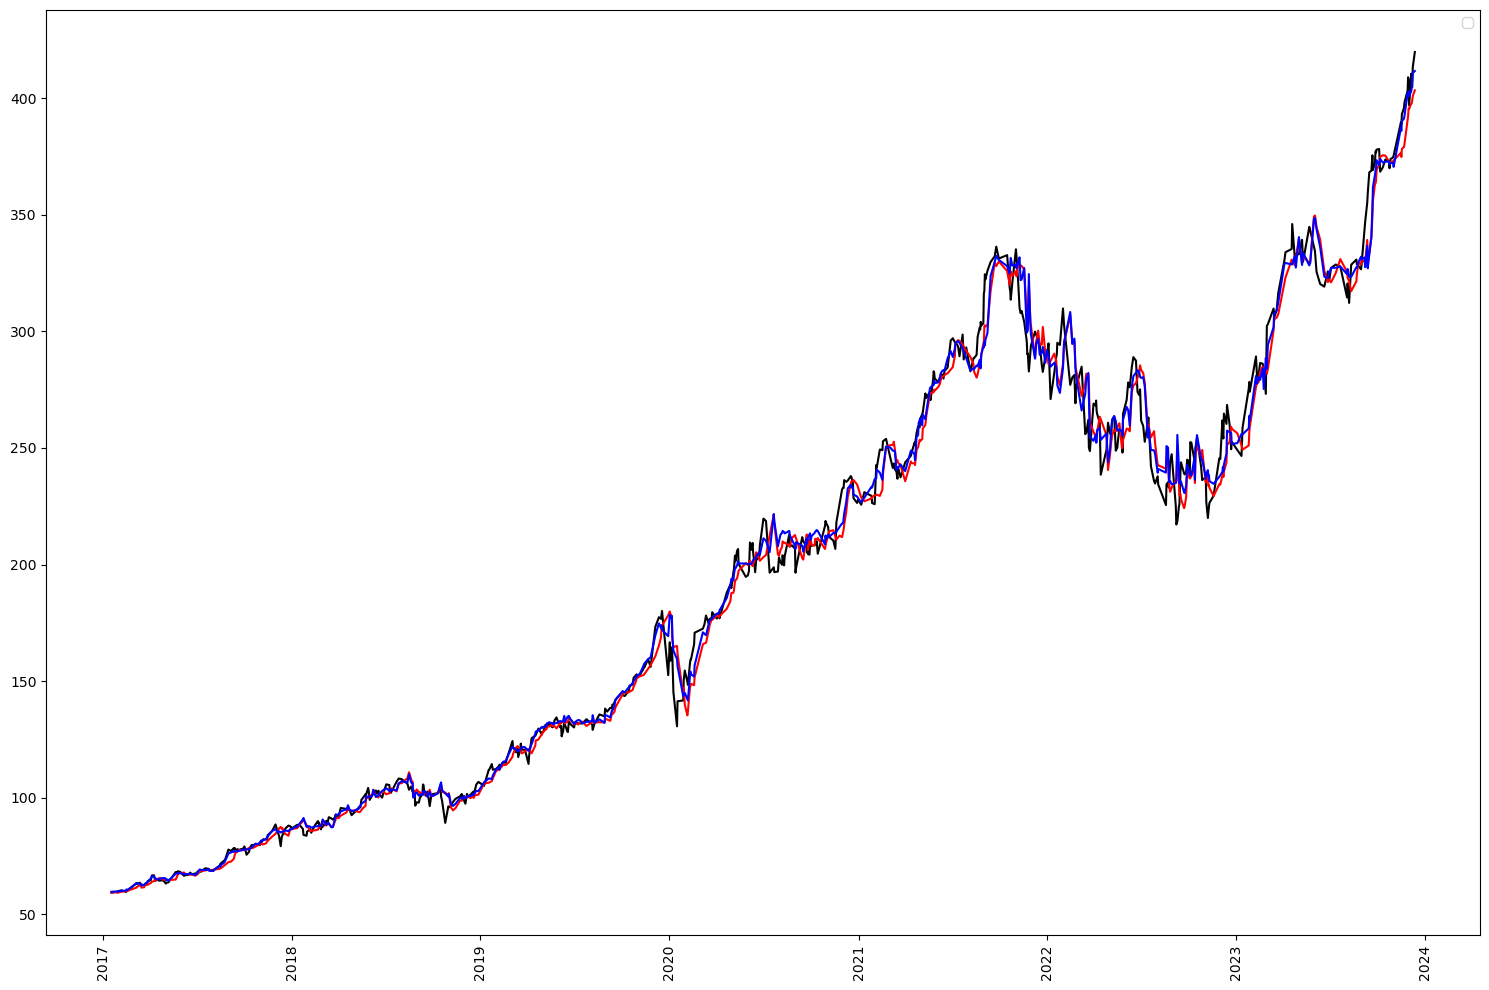

In [25]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(15)
fig.set_figheight(10)

ax.plot(y_test.sort_index().index, y_test['40d'].sort_index(),  color='black')
ax.plot(y_test.sort_index().index, y_predict[:, 1], color='red')
ax.plot(y_test.sort_index().index, y_predict[:, 7], color='blue')

ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# MOONSHOT WAY prices_to_features

In [26]:
closes = prices.loc['Close']
closes.head()

Sid         FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  FIBBG000BMHYD1  \
Date                                                                         
2017-01-03         26.9552        102.3847        113.5070         95.2870   
2017-01-04         26.9251        102.6583        114.5127         95.1307   
2017-01-05         27.0620        102.8146        113.1605         96.1260   
2017-01-06         27.3637        105.6682        112.8478         95.6653   
2017-01-09         27.6143        106.4695        113.5070         95.6489   

Sid         FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Date                                                        
2017-01-03         57.0333         64.4867         28.2195  
2017-01-04         56.7781         63.7772         29.6192  
2017-01-05         56.7781         62.8265         30.0009  
2017-01-06         57.2702         62.7910         30.0303  
2017-01-09         57.0879         61.7551         28.8557

In [27]:
import pandas as pd
from moonshot import MoonshotML
from moonshot.commission import PerShareCommission
from quantrocket.fundamental import get_sharadar_fundamentals_reindexed_like
from quantrocket import get_prices
from quantrocket.master import get_securities_reindexed_like

In [28]:
closes

Sid         FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  FIBBG000BMHYD1  \
Date                                                                         
2017-01-03         26.9552        102.3847        113.5070         95.2870   
2017-01-04         26.9251        102.6583        114.5127         95.1307   
2017-01-05         27.0620        102.8146        113.1605         96.1260   
2017-01-06         27.3637        105.6682        112.8478         95.6653   
2017-01-09         27.6143        106.4695        113.5070         95.6489   
...                    ...             ...             ...             ...   
2024-02-12        187.1500             NaN        365.4500        156.6605   
2024-02-13        185.0400             NaN        357.5900        155.2909   
2024-02-14        184.1500             NaN        358.2300        154.5664   
2024-02-15        183.8600             NaN        361.0800        156.7300   
2024-02-16        182.3100             NaN        362.3500        156.5500   

Sid         FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Date                                                        
2017-01-03         57.0333         64.4867         28.2195  
2017-01-04         56.7781         63.7772         29.6192  
2017-01-05         56.7781         62.8265         30.0009  
2017-01-06         57.2702         62.7910         30.0303  
2017-01-09         57.0879         61.7551         28.8557  
...                    ...             ...             ...  
2024-02-12        414.4935        102.2200         27.9000  
2024-02-13        405.5700        101.3400         25.8500  
2024-02-14        409.4900        100.8400         26.7900  
2024-02-15        406.5600        103.7300         27.3900  
2024-02-16        404.0600        103.7300         27.4000  

[1793 rows x 7 columns]

## example copied from documentation "prices_to_features"

In [29]:
closes = prices.loc["Close"]
# create a dict of DataFrame features
features = {}
# use past returns...
features["returns_1d"]= closes.pct_change()
features["returns_2d"] = (closes - closes.shift(2)) / closes.shift(2)
# ...to predict next day returns
targets = closes.pct_change().shift(-1)

closes

Sid         FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  FIBBG000BMHYD1  \
Date                                                                         
2017-01-03         26.9552        102.3847        113.5070         95.2870   
2017-01-04         26.9251        102.6583        114.5127         95.1307   
2017-01-05         27.0620        102.8146        113.1605         96.1260   
2017-01-06         27.3637        105.6682        112.8478         95.6653   
2017-01-09         27.6143        106.4695        113.5070         95.6489   
...                    ...             ...             ...             ...   
2024-02-12        187.1500             NaN        365.4500        156.6605   
2024-02-13        185.0400             NaN        357.5900        155.2909   
2024-02-14        184.1500             NaN        358.2300        154.5664   
2024-02-15        183.8600             NaN        361.0800        156.7300   
2024-02-16        182.3100             NaN        362.3500        156.5500   

Sid         FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Date                                                        
2017-01-03         57.0333         64.4867         28.2195  
2017-01-04         56.7781         63.7772         29.6192  
2017-01-05         56.7781         62.8265         30.0009  
2017-01-06         57.2702         62.7910         30.0303  
2017-01-09         57.0879         61.7551         28.8557  
...                    ...             ...             ...  
2024-02-12        414.4935        102.2200         27.9000  
2024-02-13        405.5700        101.3400         25.8500  
2024-02-14        409.4900        100.8400         26.7900  
2024-02-15        406.5600        103.7300         27.3900  
2024-02-16        404.0600        103.7300         27.4000  

[1793 rows x 7 columns]

## my example "prices_to_features"

In [30]:
features = {}
targets = {}
for i in range(1, 11):
    if i < 7:
        features[f'{i}d'] = closes.shift(-i)
    else:
        targets[f'{i}d'] = closes.shift(-i)

In [31]:
features.keys()

dict_keys(['1d', '2d', '3d', '4d', '5d', '6d'])

In [32]:
targets.keys()

dict_keys(['7d', '8d', '9d', '10d'])

In [33]:
features['1d'].head(11)

Sid         FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  FIBBG000BMHYD1  \
Date                                                                         
2017-01-03         26.9251        102.6583        114.5127         95.1307   
2017-01-04         27.0620        102.8146        113.1605         96.1260   
2017-01-05         27.3637        105.6682        112.8478         95.6653   
2017-01-06         27.6143        106.4695        113.5070         95.6489   
2017-01-09         27.6422        105.9711        115.0197         95.5502   
2017-01-10         27.7907        105.9809        114.6817         94.3739   
2017-01-11         27.6747        104.8864        114.1493         94.2834   
2017-01-12         27.6259        105.1698        114.1239         94.2670   
2017-01-13         27.8487        105.7072        114.8761         94.4891   
2017-01-17         27.8464        105.6388        115.0704         94.3492   
2017-01-18         27.7977        105.6584        114.4197         93.9379   

Sid         FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Date                                                        
2017-01-03         56.7781         63.7772         29.6192  
2017-01-04         56.7781         62.8265         30.0009  
2017-01-05         57.2702         62.7910         30.0303  
2017-01-06         57.0879         61.7551         28.8557  
2017-01-09         57.0697         60.9676         30.3239  
2017-01-10         57.5892         61.5919         31.2930  
2017-01-11         57.0606         61.2585         32.3403  
2017-01-12         57.1426         61.2656         32.3109  
2017-01-13         56.9877         61.9822         31.9488  
2017-01-17         56.9604         61.2159         34.0728  
2017-01-18         56.7781         60.1162         34.6699

In [34]:
features['2d'].head(11)

Sid         FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  FIBBG000BMHYD1  \
Date                                                                         
2017-01-03         27.0620        102.8146        113.1605         96.1260   
2017-01-04         27.3637        105.6682        112.8478         95.6653   
2017-01-05         27.6143        106.4695        113.5070         95.6489   
2017-01-06         27.6422        105.9711        115.0197         95.5502   
2017-01-09         27.7907        105.9809        114.6817         94.3739   
2017-01-10         27.6747        104.8864        114.1493         94.2834   
2017-01-11         27.6259        105.1698        114.1239         94.2670   
2017-01-12         27.8487        105.7072        114.8761         94.4891   
2017-01-13         27.8464        105.6388        115.0704         94.3492   
2017-01-17         27.7977        105.6584        114.4197         93.9379   
2017-01-18         27.8487        106.1079        114.5972         93.8968   

Sid         FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Date                                                        
2017-01-03         56.7781         62.8265         30.0009  
2017-01-04         57.2702         62.7910         30.0303  
2017-01-05         57.0879         61.7551         28.8557  
2017-01-06         57.0697         60.9676         30.3239  
2017-01-09         57.5892         61.5919         31.2930  
2017-01-10         57.0606         61.2585         32.3403  
2017-01-11         57.1426         61.2656         32.3109  
2017-01-12         56.9877         61.9822         31.9488  
2017-01-13         56.9604         61.2159         34.0728  
2017-01-17         56.7781         60.1162         34.6699  
2017-01-18         57.1791         60.9392         34.9048

In [35]:
targets['10d'].head(11)

Sid         FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  FIBBG000BMHYD1  \
Date                                                                         
2017-01-03         27.8464        105.6388        115.0704         94.3492   
2017-01-04         27.7977        105.6584        114.4197         93.9379   
2017-01-05         27.8487        106.1079        114.5972         93.8968   
2017-01-06         27.8673        105.9711        116.6846         93.6994   
2017-01-09         27.8418        106.3620        116.6761         91.9309   
2017-01-10         28.2850        108.3165        116.1860         92.7863   
2017-01-11         28.2989        107.3001        117.0142         91.9967   
2017-01-12         28.3013        106.9092        116.9043         93.2634   
2017-01-13         28.2270        106.0981        117.0226         93.0578   
2017-01-17         28.1620        105.8441        116.2705         93.1565   
2017-01-18         29.8794        105.9906        116.1522         93.1400   

Sid         FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Date                                                        
2017-01-03         56.9604         61.2159         34.0728  
2017-01-04         56.7781         60.1162         34.6699  
2017-01-05         57.1791         60.9392         34.9048  
2017-01-06         57.3796         60.2865         35.5215  
2017-01-09         57.8900         60.3716         36.7059  
2017-01-10         58.0358         60.5490         35.7564  
2017-01-11         58.5735         60.7334         35.5313  
2017-01-12         59.9496         60.6696         35.8934  
2017-01-13         59.3573         60.2084         35.7760  
2017-01-17         58.9198         59.5202         35.6781  
2017-01-18         57.9446         58.8462         35.4921